<a href="https://www.kaggle.com/code/siddp6/simple-skip-connection?scriptVersionId=138878509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Skip Connection

## Why we need Skip Connection?

- **Hidden layers**: The hidden layers are responsible for learning and representing increasingly complex patterns and features in the data.  The purpose of hidden layers is to transform the input data into more meaningful and abstract representations that capture the underlying relationships within the data.
- Okay, so with each hidden layer help to identify more favourable pattern, so with more hidden layer means our model will be able to pick the pattern more accurately. But in actually **with more hidden layer, models start to lose accuracy**. And this phenomas is called **Vanishing gradient Problem.**
- Reason for this, it is quite easy. Deep learning model use a concept called **Backpropagation**, which means model will use some weight to run the model, then it will make prediction and cacluate the loss. Then using  backpropagation it tell previous layers to update the weight in such a way to minimze the loss using **gradients**. But this gradients will get weaker and weaker as it pass throught layer.
- **In short, During the backpropagation process, gradients get smaller and smaller as they propagate back through the layers. As a result, the early layers of the network receive very small gradients, which can cause slow or ineffective learning.**
- To solve this problem we need Skip Connection

# What is skip Connection (also known as residual connection)?
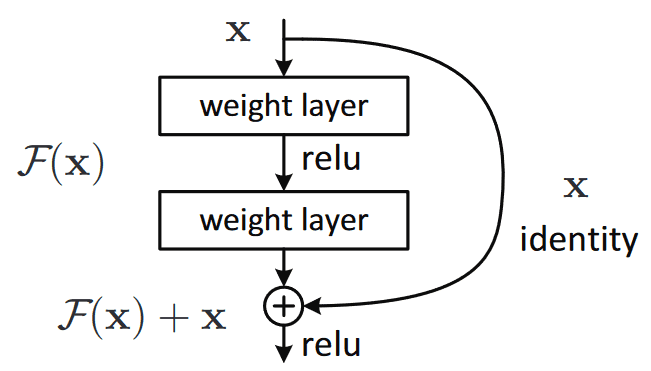

- The concept of skip connections was first introduced in the "ResNet" (Residual Network) architecture by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition." In ResNet, each layer is defined as: **Output = Activation(Layer(Input)) + Input**
- Here, the output of a layer is obtained by adding the output of a convolutional operation (with an activation function applied) to the input of the layer. By doing so, the network is encouraged to **learn residuals (differences) between the input and the desired output**, rather than directly learning the mapping. 
- When gradients are backpropagated, the direct connections provided by the skip connections allow the gradients to flow without getting severely diminished by the intermediate layers.

# Let us see the example 
(this is very basic exmple to show now skip connection can reduce the loss when we increase the number of hidden layer)

> Go to last cell to see the analysis

# Imports

In [14]:
# my utility: https://www.kaggle.com/code/siddp6/utility
import deep_learning_utility as utility

In [15]:
# Importing necessary libraries for working with PyTorch neural networks and optimization.

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Initalisation

In [16]:
# Define the sizes of the input, hidden, and output layers
input_size, hidden_size, output_size = 512, 128, 32

# Set the number of training samples and epochs
num_samples = 100000
epochs =100

# Generate random input data and target data using PyTorch
input_data = torch.rand(num_samples, input_size)
target_data = torch.rand(num_samples, output_size)

# Create a DataLoader using TensorDataset
train_dataset = TensorDataset(input_data, target_data)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Adjust batch_size as needed

# Initialize empty lists to store loss values for different models and skip connections
loss_normal_3, loss_normal_6 = list(), list()  # Lists for losses in models without skip connections
loss_skip_3, loss_skip_6 = list(), list()      # Lists for losses in models with skip connections


# Normal Model (3 layered) (without skip-connection)

In [17]:
class NormalNet3(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        """
        Initialize a 3-layer neural network.

        Args:
            input_size (int): The size of the input features.
            output_size (int): The size of the output predictions.
            hidden_size (int): The size of the hidden layer.

        Note:
            This is a 3-layer neural network with no skip connections.
        """
        super(NormalNet3, self).__init__()
        
        # Define the layers of the neural network
        self.layer_1 = nn.Linear(input_size, hidden_size)  
        self.layer_2 = nn.Linear(hidden_size, hidden_size) 
        self.layer_3 = nn.Linear(hidden_size, output_size) 
        
        # Define the activation function
        self.relu = nn.ReLU()  
        
    def forward(self, X):
        # Pass the input through each layer and apply ReLU activation
        X = self.relu(self.layer_1(X))  
        X = self.relu(self.layer_2(X))  
        X = self.relu(self.layer_3(X))  
        
        return X  # Return the final output of the network


In [18]:
normal_model_3 = NormalNet3(input_size, output_size, hidden_size)

criterion = nn.MSELoss()

optimizer = optim.SGD(normal_model_3.parameters(), lr=0.01)
loss_normal_3 = utility.train(normal_model_3, epochs, train_loader, optimizer, criterion, is_cuda=False)

Epochs:   1%|▎                                  | 1/100 [00:02<04:31,  2.75s/it]

Epoch: 1 	Training Loss: 0.147741 


Epochs:   2%|▋                                  | 2/100 [00:05<04:24,  2.70s/it]

Epoch: 2 	Training Loss: 0.138578 


Epochs:   3%|█                                  | 3/100 [00:08<04:20,  2.69s/it]

Epoch: 3 	Training Loss: 0.138517 


Epochs:   4%|█▍                                 | 4/100 [00:10<04:19,  2.71s/it]

Epoch: 4 	Training Loss: 0.138465 


Epochs:   5%|█▊                                 | 5/100 [00:13<04:16,  2.70s/it]

Epoch: 5 	Training Loss: 0.138420 


Epochs:   6%|██                                 | 6/100 [00:16<04:13,  2.69s/it]

Epoch: 6 	Training Loss: 0.138383 


Epochs:   7%|██▍                                | 7/100 [00:18<04:10,  2.70s/it]

Epoch: 7 	Training Loss: 0.138354 


Epochs:   8%|██▊                                | 8/100 [00:22<04:20,  2.83s/it]

Epoch: 8 	Training Loss: 0.138329 


Epochs:   9%|███▏                               | 9/100 [00:24<04:20,  2.86s/it]

Epoch: 9 	Training Loss: 0.138309 


Epochs:  10%|███▍                              | 10/100 [00:27<04:14,  2.83s/it]

Epoch: 10 	Training Loss: 0.138291 


Epochs:  11%|███▋                              | 11/100 [00:30<04:09,  2.81s/it]

Epoch: 11 	Training Loss: 0.138276 


Epochs:  12%|████                              | 12/100 [00:33<04:03,  2.77s/it]

Epoch: 12 	Training Loss: 0.138261 


Epochs:  13%|████▍                             | 13/100 [00:35<03:56,  2.72s/it]

Epoch: 13 	Training Loss: 0.138249 


Epochs:  14%|████▊                             | 14/100 [00:38<03:52,  2.70s/it]

Epoch: 14 	Training Loss: 0.138237 


Epochs:  15%|█████                             | 15/100 [00:41<03:50,  2.71s/it]

Epoch: 15 	Training Loss: 0.138226 


Epochs:  16%|█████▍                            | 16/100 [00:43<03:46,  2.70s/it]

Epoch: 16 	Training Loss: 0.138217 


Epochs:  17%|█████▊                            | 17/100 [00:46<03:43,  2.70s/it]

Epoch: 17 	Training Loss: 0.138206 


Epochs:  18%|██████                            | 18/100 [00:49<03:42,  2.71s/it]

Epoch: 18 	Training Loss: 0.138199 


Epochs:  19%|██████▍                           | 19/100 [00:51<03:38,  2.69s/it]

Epoch: 19 	Training Loss: 0.138190 


Epochs:  20%|██████▊                           | 20/100 [00:55<03:47,  2.85s/it]

Epoch: 20 	Training Loss: 0.138182 


Epochs:  21%|███████▏                          | 21/100 [00:57<03:41,  2.80s/it]

Epoch: 21 	Training Loss: 0.138175 


Epochs:  22%|███████▍                          | 22/100 [01:00<03:37,  2.79s/it]

Epoch: 22 	Training Loss: 0.138167 


Epochs:  23%|███████▊                          | 23/100 [01:03<03:33,  2.77s/it]

Epoch: 23 	Training Loss: 0.138160 


Epochs:  24%|████████▏                         | 24/100 [01:05<03:28,  2.74s/it]

Epoch: 24 	Training Loss: 0.138155 


Epochs:  25%|████████▌                         | 25/100 [01:08<03:24,  2.73s/it]

Epoch: 25 	Training Loss: 0.138149 


Epochs:  26%|████████▊                         | 26/100 [01:11<03:21,  2.72s/it]

Epoch: 26 	Training Loss: 0.138143 


Epochs:  27%|█████████▏                        | 27/100 [01:14<03:17,  2.71s/it]

Epoch: 27 	Training Loss: 0.138137 


Epochs:  28%|█████████▌                        | 28/100 [01:16<03:14,  2.71s/it]

Epoch: 28 	Training Loss: 0.138132 


Epochs:  29%|█████████▊                        | 29/100 [01:19<03:13,  2.73s/it]

Epoch: 29 	Training Loss: 0.138128 


Epochs:  30%|██████████▏                       | 30/100 [01:22<03:09,  2.71s/it]

Epoch: 30 	Training Loss: 0.138122 


Epochs:  31%|██████████▌                       | 31/100 [01:24<03:06,  2.71s/it]

Epoch: 31 	Training Loss: 0.138116 


Epochs:  32%|██████████▉                       | 32/100 [01:28<03:15,  2.87s/it]

Epoch: 32 	Training Loss: 0.138113 


Epochs:  33%|███████████▏                      | 33/100 [01:30<03:10,  2.85s/it]

Epoch: 33 	Training Loss: 0.138108 


Epochs:  34%|███████████▌                      | 34/100 [01:33<03:03,  2.79s/it]

Epoch: 34 	Training Loss: 0.138103 


Epochs:  35%|███████████▉                      | 35/100 [01:36<02:58,  2.74s/it]

Epoch: 35 	Training Loss: 0.138098 


Epochs:  36%|████████████▏                     | 36/100 [01:38<02:54,  2.72s/it]

Epoch: 36 	Training Loss: 0.138095 


Epochs:  37%|████████████▌                     | 37/100 [01:41<02:51,  2.72s/it]

Epoch: 37 	Training Loss: 0.138091 


Epochs:  38%|████████████▉                     | 38/100 [01:44<02:48,  2.72s/it]

Epoch: 38 	Training Loss: 0.138087 


Epochs:  39%|█████████████▎                    | 39/100 [01:46<02:44,  2.70s/it]

Epoch: 39 	Training Loss: 0.138083 


Epochs:  40%|█████████████▌                    | 40/100 [01:49<02:42,  2.71s/it]

Epoch: 40 	Training Loss: 0.138080 


Epochs:  41%|█████████████▉                    | 41/100 [01:52<02:38,  2.69s/it]

Epoch: 41 	Training Loss: 0.138076 


Epochs:  42%|██████████████▎                   | 42/100 [01:55<02:35,  2.68s/it]

Epoch: 42 	Training Loss: 0.138073 


Epochs:  43%|██████████████▌                   | 43/100 [01:57<02:37,  2.76s/it]

Epoch: 43 	Training Loss: 0.138069 


Epochs:  44%|██████████████▉                   | 44/100 [02:01<02:40,  2.86s/it]

Epoch: 44 	Training Loss: 0.138066 


Epochs:  45%|███████████████▎                  | 45/100 [02:03<02:34,  2.81s/it]

Epoch: 45 	Training Loss: 0.138063 


Epochs:  46%|███████████████▋                  | 46/100 [02:06<02:30,  2.78s/it]

Epoch: 46 	Training Loss: 0.138060 


Epochs:  47%|███████████████▉                  | 47/100 [02:09<02:26,  2.76s/it]

Epoch: 47 	Training Loss: 0.138058 


Epochs:  48%|████████████████▎                 | 48/100 [02:11<02:21,  2.72s/it]

Epoch: 48 	Training Loss: 0.138054 


Epochs:  49%|████████████████▋                 | 49/100 [02:14<02:18,  2.72s/it]

Epoch: 49 	Training Loss: 0.138051 


Epochs:  50%|█████████████████                 | 50/100 [02:17<02:16,  2.73s/it]

Epoch: 50 	Training Loss: 0.138049 


Epochs:  51%|█████████████████▎                | 51/100 [02:20<02:14,  2.75s/it]

Epoch: 51 	Training Loss: 0.138046 


Epochs:  52%|█████████████████▋                | 52/100 [02:22<02:11,  2.73s/it]

Epoch: 52 	Training Loss: 0.138043 


Epochs:  53%|██████████████████                | 53/100 [02:25<02:08,  2.73s/it]

Epoch: 53 	Training Loss: 0.138041 


Epochs:  54%|██████████████████▎               | 54/100 [02:28<02:05,  2.72s/it]

Epoch: 54 	Training Loss: 0.138038 


Epochs:  55%|██████████████████▋               | 55/100 [02:31<02:11,  2.92s/it]

Epoch: 55 	Training Loss: 0.138035 


Epochs:  56%|███████████████████               | 56/100 [02:34<02:05,  2.86s/it]

Epoch: 56 	Training Loss: 0.138034 


Epochs:  57%|███████████████████▍              | 57/100 [02:37<02:01,  2.82s/it]

Epoch: 57 	Training Loss: 0.138031 


Epochs:  58%|███████████████████▋              | 58/100 [02:39<01:57,  2.80s/it]

Epoch: 58 	Training Loss: 0.138029 


Epochs:  59%|████████████████████              | 59/100 [02:42<01:53,  2.76s/it]

Epoch: 59 	Training Loss: 0.138026 


Epochs:  60%|████████████████████▍             | 60/100 [02:45<01:49,  2.74s/it]

Epoch: 60 	Training Loss: 0.138024 


Epochs:  61%|████████████████████▋             | 61/100 [02:47<01:46,  2.72s/it]

Epoch: 61 	Training Loss: 0.138022 


Epochs:  62%|█████████████████████             | 62/100 [02:50<01:43,  2.73s/it]

Epoch: 62 	Training Loss: 0.138020 


Epochs:  63%|█████████████████████▍            | 63/100 [02:53<01:40,  2.73s/it]

Epoch: 63 	Training Loss: 0.138018 


Epochs:  64%|█████████████████████▊            | 64/100 [02:55<01:37,  2.71s/it]

Epoch: 64 	Training Loss: 0.138016 


Epochs:  65%|██████████████████████            | 65/100 [02:58<01:34,  2.71s/it]

Epoch: 65 	Training Loss: 0.138014 


Epochs:  66%|██████████████████████▍           | 66/100 [03:01<01:32,  2.72s/it]

Epoch: 66 	Training Loss: 0.138012 


Epochs:  67%|██████████████████████▊           | 67/100 [03:04<01:35,  2.89s/it]

Epoch: 67 	Training Loss: 0.138010 


Epochs:  68%|███████████████████████           | 68/100 [03:07<01:31,  2.85s/it]

Epoch: 68 	Training Loss: 0.138009 


Epochs:  69%|███████████████████████▍          | 69/100 [03:10<01:27,  2.82s/it]

Epoch: 69 	Training Loss: 0.138006 


Epochs:  70%|███████████████████████▊          | 70/100 [03:12<01:23,  2.79s/it]

Epoch: 70 	Training Loss: 0.138004 


Epochs:  71%|████████████████████████▏         | 71/100 [03:15<01:20,  2.79s/it]

Epoch: 71 	Training Loss: 0.138002 


Epochs:  72%|████████████████████████▍         | 72/100 [03:18<01:17,  2.77s/it]

Epoch: 72 	Training Loss: 0.138000 


Epochs:  73%|████████████████████████▊         | 73/100 [03:21<01:14,  2.76s/it]

Epoch: 73 	Training Loss: 0.137999 


Epochs:  74%|█████████████████████████▏        | 74/100 [03:23<01:11,  2.74s/it]

Epoch: 74 	Training Loss: 0.137997 


Epochs:  75%|█████████████████████████▌        | 75/100 [03:26<01:08,  2.74s/it]

Epoch: 75 	Training Loss: 0.137995 


Epochs:  76%|█████████████████████████▊        | 76/100 [03:29<01:05,  2.73s/it]

Epoch: 76 	Training Loss: 0.137993 


Epochs:  77%|██████████████████████████▏       | 77/100 [03:32<01:02,  2.74s/it]

Epoch: 77 	Training Loss: 0.137992 


Epochs:  78%|██████████████████████████▌       | 78/100 [03:35<01:03,  2.89s/it]

Epoch: 78 	Training Loss: 0.137989 


Epochs:  79%|██████████████████████████▊       | 79/100 [03:38<00:59,  2.83s/it]

Epoch: 79 	Training Loss: 0.137989 


Epochs:  80%|███████████████████████████▏      | 80/100 [03:40<00:55,  2.80s/it]

Epoch: 80 	Training Loss: 0.137987 


Epochs:  81%|███████████████████████████▌      | 81/100 [03:43<00:52,  2.77s/it]

Epoch: 81 	Training Loss: 0.137987 


Epochs:  82%|███████████████████████████▉      | 82/100 [03:46<00:49,  2.73s/it]

Epoch: 82 	Training Loss: 0.137985 


Epochs:  83%|████████████████████████████▏     | 83/100 [03:48<00:46,  2.72s/it]

Epoch: 83 	Training Loss: 0.137983 


Epochs:  84%|████████████████████████████▌     | 84/100 [03:51<00:43,  2.72s/it]

Epoch: 84 	Training Loss: 0.137982 


Epochs:  85%|████████████████████████████▉     | 85/100 [03:54<00:40,  2.71s/it]

Epoch: 85 	Training Loss: 0.137980 


Epochs:  86%|█████████████████████████████▏    | 86/100 [03:56<00:37,  2.71s/it]

Epoch: 86 	Training Loss: 0.137979 


Epochs:  87%|█████████████████████████████▌    | 87/100 [03:59<00:35,  2.73s/it]

Epoch: 87 	Training Loss: 0.137978 


Epochs:  88%|█████████████████████████████▉    | 88/100 [04:02<00:32,  2.74s/it]

Epoch: 88 	Training Loss: 0.137976 


Epochs:  89%|██████████████████████████████▎   | 89/100 [04:05<00:30,  2.74s/it]

Epoch: 89 	Training Loss: 0.137974 


Epochs:  90%|██████████████████████████████▌   | 90/100 [04:08<00:29,  2.92s/it]

Epoch: 90 	Training Loss: 0.137973 


Epochs:  91%|██████████████████████████████▉   | 91/100 [04:11<00:25,  2.86s/it]

Epoch: 91 	Training Loss: 0.137972 


Epochs:  92%|███████████████████████████████▎  | 92/100 [04:13<00:22,  2.81s/it]

Epoch: 92 	Training Loss: 0.137971 


Epochs:  93%|███████████████████████████████▌  | 93/100 [04:16<00:19,  2.77s/it]

Epoch: 93 	Training Loss: 0.137970 


Epochs:  94%|███████████████████████████████▉  | 94/100 [04:19<00:16,  2.77s/it]

Epoch: 94 	Training Loss: 0.137969 


Epochs:  95%|████████████████████████████████▎ | 95/100 [04:22<00:13,  2.73s/it]

Epoch: 95 	Training Loss: 0.137967 


Epochs:  96%|████████████████████████████████▋ | 96/100 [04:24<00:10,  2.71s/it]

Epoch: 96 	Training Loss: 0.137966 


Epochs:  97%|████████████████████████████████▉ | 97/100 [04:27<00:08,  2.72s/it]

Epoch: 97 	Training Loss: 0.137965 


Epochs:  98%|█████████████████████████████████▎| 98/100 [04:30<00:05,  2.72s/it]

Epoch: 98 	Training Loss: 0.137964 


Epochs:  99%|█████████████████████████████████▋| 99/100 [04:32<00:02,  2.73s/it]

Epoch: 99 	Training Loss: 0.137963 


Epochs: 100%|█████████████████████████████████| 100/100 [04:35<00:00,  2.76s/it]

Epoch: 100 	Training Loss: 0.137961 


# Normal Model (7 layered) (without skip-connection)

In [19]:
class NormalNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(NormalNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X)
        
        return X

In [20]:
normal_model_7 = NormalNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(normal_model_7.parameters(), lr=.01)
loss_normal_7 = utility.train(normal_model_7, epochs, train_loader, optimizer, criterion, is_cuda=False)

Epochs:   1%|▎                                  | 1/100 [00:04<07:24,  4.49s/it]

Epoch: 1 	Training Loss: 0.204827 


Epochs:   2%|▋                                  | 2/100 [00:08<06:42,  4.11s/it]

Epoch: 2 	Training Loss: 0.153878 


Epochs:   3%|█                                  | 3/100 [00:12<06:30,  4.02s/it]

Epoch: 3 	Training Loss: 0.153634 


Epochs:   4%|█▍                                 | 4/100 [00:16<06:20,  3.97s/it]

Epoch: 4 	Training Loss: 0.153633 


Epochs:   5%|█▊                                 | 5/100 [00:19<06:12,  3.92s/it]

Epoch: 5 	Training Loss: 0.153633 


Epochs:   6%|██                                 | 6/100 [00:23<06:09,  3.93s/it]

Epoch: 6 	Training Loss: 0.153633 


Epochs:   7%|██▍                                | 7/100 [00:27<06:04,  3.92s/it]

Epoch: 7 	Training Loss: 0.153633 


Epochs:   8%|██▊                                | 8/100 [00:31<06:02,  3.94s/it]

Epoch: 8 	Training Loss: 0.153633 


Epochs:   9%|███▏                               | 9/100 [00:36<06:15,  4.12s/it]

Epoch: 9 	Training Loss: 0.153633 


Epochs:  10%|███▍                              | 10/100 [00:40<06:04,  4.04s/it]

Epoch: 10 	Training Loss: 0.153633 


Epochs:  11%|███▋                              | 11/100 [00:44<05:58,  4.03s/it]

Epoch: 11 	Training Loss: 0.153633 


Epochs:  12%|████                              | 12/100 [00:48<05:49,  3.97s/it]

Epoch: 12 	Training Loss: 0.153633 


Epochs:  13%|████▍                             | 13/100 [00:51<05:42,  3.94s/it]

Epoch: 13 	Training Loss: 0.153633 


Epochs:  14%|████▊                             | 14/100 [00:55<05:39,  3.95s/it]

Epoch: 14 	Training Loss: 0.153633 


Epochs:  15%|█████                             | 15/100 [00:59<05:36,  3.95s/it]

Epoch: 15 	Training Loss: 0.153633 


Epochs:  16%|█████▍                            | 16/100 [01:03<05:30,  3.93s/it]

Epoch: 16 	Training Loss: 0.153633 


Epochs:  17%|█████▊                            | 17/100 [01:08<05:39,  4.09s/it]

Epoch: 17 	Training Loss: 0.153633 


Epochs:  18%|██████                            | 18/100 [01:12<05:29,  4.02s/it]

Epoch: 18 	Training Loss: 0.153633 


Epochs:  19%|██████▍                           | 19/100 [01:15<05:22,  3.98s/it]

Epoch: 19 	Training Loss: 0.153633 


Epochs:  20%|██████▊                           | 20/100 [01:19<05:15,  3.95s/it]

Epoch: 20 	Training Loss: 0.153633 


Epochs:  21%|███████▏                          | 21/100 [01:23<05:12,  3.96s/it]

Epoch: 21 	Training Loss: 0.153633 


Epochs:  22%|███████▍                          | 22/100 [01:27<05:05,  3.92s/it]

Epoch: 22 	Training Loss: 0.153633 


Epochs:  23%|███████▊                          | 23/100 [01:31<05:03,  3.94s/it]

Epoch: 23 	Training Loss: 0.153633 


Epochs:  24%|████████▏                         | 24/100 [01:35<04:58,  3.93s/it]

Epoch: 24 	Training Loss: 0.153633 


Epochs:  25%|████████▌                         | 25/100 [01:39<05:06,  4.09s/it]

Epoch: 25 	Training Loss: 0.153633 


Epochs:  26%|████████▊                         | 26/100 [01:44<05:02,  4.09s/it]

Epoch: 26 	Training Loss: 0.153633 


Epochs:  27%|█████████▏                        | 27/100 [01:47<04:54,  4.03s/it]

Epoch: 27 	Training Loss: 0.153633 


Epochs:  28%|█████████▌                        | 28/100 [01:51<04:48,  4.00s/it]

Epoch: 28 	Training Loss: 0.153633 


Epochs:  29%|█████████▊                        | 29/100 [01:55<04:44,  4.01s/it]

Epoch: 29 	Training Loss: 0.153633 


Epochs:  30%|██████████▏                       | 30/100 [01:59<04:37,  3.96s/it]

Epoch: 30 	Training Loss: 0.153633 


Epochs:  31%|██████████▌                       | 31/100 [02:03<04:30,  3.93s/it]

Epoch: 31 	Training Loss: 0.153633 


Epochs:  32%|██████████▉                       | 32/100 [02:07<04:23,  3.87s/it]

Epoch: 32 	Training Loss: 0.153633 


Epochs:  33%|███████████▏                      | 33/100 [02:11<04:28,  4.00s/it]

Epoch: 33 	Training Loss: 0.153633 


Epochs:  34%|███████████▌                      | 34/100 [02:15<04:25,  4.03s/it]

Epoch: 34 	Training Loss: 0.153633 


Epochs:  35%|███████████▉                      | 35/100 [02:19<04:18,  3.98s/it]

Epoch: 35 	Training Loss: 0.153633 


Epochs:  36%|████████████▏                     | 36/100 [02:23<04:11,  3.93s/it]

Epoch: 36 	Training Loss: 0.153633 


Epochs:  37%|████████████▌                     | 37/100 [02:27<04:05,  3.89s/it]

Epoch: 37 	Training Loss: 0.153633 


Epochs:  38%|████████████▉                     | 38/100 [02:31<04:00,  3.88s/it]

Epoch: 38 	Training Loss: 0.153633 


Epochs:  39%|█████████████▎                    | 39/100 [02:34<03:56,  3.89s/it]

Epoch: 39 	Training Loss: 0.153633 


Epochs:  40%|█████████████▌                    | 40/100 [02:38<03:52,  3.87s/it]

Epoch: 40 	Training Loss: 0.153633 


Epochs:  41%|█████████████▉                    | 41/100 [02:42<03:47,  3.86s/it]

Epoch: 41 	Training Loss: 0.153633 


Epochs:  42%|██████████████▎                   | 42/100 [02:47<03:54,  4.04s/it]

Epoch: 42 	Training Loss: 0.153633 


Epochs:  43%|██████████████▌                   | 43/100 [02:50<03:47,  3.98s/it]

Epoch: 43 	Training Loss: 0.153633 


Epochs:  44%|██████████████▉                   | 44/100 [02:54<03:41,  3.96s/it]

Epoch: 44 	Training Loss: 0.153633 


Epochs:  45%|███████████████▎                  | 45/100 [02:58<03:35,  3.92s/it]

Epoch: 45 	Training Loss: 0.153633 


Epochs:  46%|███████████████▋                  | 46/100 [03:02<03:30,  3.89s/it]

Epoch: 46 	Training Loss: 0.153633 


Epochs:  47%|███████████████▉                  | 47/100 [03:06<03:25,  3.88s/it]

Epoch: 47 	Training Loss: 0.153633 


Epochs:  48%|████████████████▎                 | 48/100 [03:10<03:21,  3.87s/it]

Epoch: 48 	Training Loss: 0.153633 


Epochs:  49%|████████████████▋                 | 49/100 [03:14<03:17,  3.88s/it]

Epoch: 49 	Training Loss: 0.153633 


Epochs:  50%|█████████████████                 | 50/100 [03:18<03:20,  4.02s/it]

Epoch: 50 	Training Loss: 0.153633 


Epochs:  51%|█████████████████▎                | 51/100 [03:22<03:14,  3.96s/it]

Epoch: 51 	Training Loss: 0.153633 


Epochs:  52%|█████████████████▋                | 52/100 [03:26<03:09,  3.95s/it]

Epoch: 52 	Training Loss: 0.153633 


Epochs:  53%|██████████████████                | 53/100 [03:29<03:02,  3.88s/it]

Epoch: 53 	Training Loss: 0.153633 


Epochs:  54%|██████████████████▎               | 54/100 [03:33<02:59,  3.89s/it]

Epoch: 54 	Training Loss: 0.153633 


Epochs:  55%|██████████████████▋               | 55/100 [03:37<02:55,  3.90s/it]

Epoch: 55 	Training Loss: 0.153632 


Epochs:  56%|███████████████████               | 56/100 [03:41<02:50,  3.88s/it]

Epoch: 56 	Training Loss: 0.153633 


Epochs:  57%|███████████████████▍              | 57/100 [03:45<02:46,  3.88s/it]

Epoch: 57 	Training Loss: 0.153633 


Epochs:  58%|███████████████████▋              | 58/100 [03:49<02:48,  4.02s/it]

Epoch: 58 	Training Loss: 0.153633 


Epochs:  59%|████████████████████              | 59/100 [03:53<02:42,  3.97s/it]

Epoch: 59 	Training Loss: 0.153632 


Epochs:  60%|████████████████████▍             | 60/100 [03:57<02:36,  3.92s/it]

Epoch: 60 	Training Loss: 0.153632 


Epochs:  61%|████████████████████▋             | 61/100 [04:01<02:31,  3.89s/it]

Epoch: 61 	Training Loss: 0.153633 


Epochs:  62%|█████████████████████             | 62/100 [04:05<02:28,  3.90s/it]

Epoch: 62 	Training Loss: 0.153633 


Epochs:  63%|█████████████████████▍            | 63/100 [04:09<02:23,  3.88s/it]

Epoch: 63 	Training Loss: 0.153633 


Epochs:  64%|█████████████████████▊            | 64/100 [04:12<02:18,  3.85s/it]

Epoch: 64 	Training Loss: 0.153633 


Epochs:  65%|██████████████████████            | 65/100 [04:16<02:15,  3.87s/it]

Epoch: 65 	Training Loss: 0.153633 


Epochs:  66%|██████████████████████▍           | 66/100 [04:21<02:16,  4.01s/it]

Epoch: 66 	Training Loss: 0.153632 


Epochs:  67%|██████████████████████▊           | 67/100 [04:24<02:11,  3.98s/it]

Epoch: 67 	Training Loss: 0.153633 


Epochs:  68%|███████████████████████           | 68/100 [04:28<02:05,  3.93s/it]

Epoch: 68 	Training Loss: 0.153633 


Epochs:  69%|███████████████████████▍          | 69/100 [04:32<02:02,  3.94s/it]

Epoch: 69 	Training Loss: 0.153633 


Epochs:  70%|███████████████████████▊          | 70/100 [04:36<01:58,  3.94s/it]

Epoch: 70 	Training Loss: 0.153633 


Epochs:  71%|████████████████████████▏         | 71/100 [04:40<01:53,  3.92s/it]

Epoch: 71 	Training Loss: 0.153633 


Epochs:  72%|████████████████████████▍         | 72/100 [04:44<01:49,  3.93s/it]

Epoch: 72 	Training Loss: 0.153633 


Epochs:  73%|████████████████████████▊         | 73/100 [04:48<01:44,  3.89s/it]

Epoch: 73 	Training Loss: 0.153632 


Epochs:  74%|█████████████████████████▏        | 74/100 [04:52<01:44,  4.02s/it]

Epoch: 74 	Training Loss: 0.153632 


Epochs:  75%|█████████████████████████▌        | 75/100 [04:56<01:39,  4.00s/it]

Epoch: 75 	Training Loss: 0.153632 


Epochs:  76%|█████████████████████████▊        | 76/100 [05:00<01:34,  3.93s/it]

Epoch: 76 	Training Loss: 0.153633 


Epochs:  77%|██████████████████████████▏       | 77/100 [05:04<01:29,  3.91s/it]

Epoch: 77 	Training Loss: 0.153633 


Epochs:  78%|██████████████████████████▌       | 78/100 [05:08<01:25,  3.88s/it]

Epoch: 78 	Training Loss: 0.153632 


Epochs:  79%|██████████████████████████▊       | 79/100 [05:11<01:20,  3.84s/it]

Epoch: 79 	Training Loss: 0.153633 


Epochs:  80%|███████████████████████████▏      | 80/100 [05:15<01:16,  3.85s/it]

Epoch: 80 	Training Loss: 0.153633 


Epochs:  81%|███████████████████████████▌      | 81/100 [05:19<01:13,  3.84s/it]

Epoch: 81 	Training Loss: 0.153632 


Epochs:  82%|███████████████████████████▉      | 82/100 [05:23<01:10,  3.90s/it]

Epoch: 82 	Training Loss: 0.153632 


Epochs:  83%|████████████████████████████▏     | 83/100 [05:27<01:08,  4.01s/it]

Epoch: 83 	Training Loss: 0.153633 


Epochs:  84%|████████████████████████████▌     | 84/100 [05:31<01:03,  3.96s/it]

Epoch: 84 	Training Loss: 0.153632 


Epochs:  85%|████████████████████████████▉     | 85/100 [05:35<00:59,  3.94s/it]

Epoch: 85 	Training Loss: 0.153632 


Epochs:  86%|█████████████████████████████▏    | 86/100 [05:39<00:55,  3.94s/it]

Epoch: 86 	Training Loss: 0.153632 


Epochs:  87%|█████████████████████████████▌    | 87/100 [05:43<00:51,  3.93s/it]

Epoch: 87 	Training Loss: 0.153632 


Epochs:  88%|█████████████████████████████▉    | 88/100 [05:47<00:46,  3.89s/it]

Epoch: 88 	Training Loss: 0.153632 


Epochs:  89%|██████████████████████████████▎   | 89/100 [05:50<00:42,  3.85s/it]

Epoch: 89 	Training Loss: 0.153632 


Epochs:  90%|██████████████████████████████▌   | 90/100 [05:54<00:38,  3.86s/it]

Epoch: 90 	Training Loss: 0.153632 


Epochs:  91%|██████████████████████████████▉   | 91/100 [05:59<00:36,  4.03s/it]

Epoch: 91 	Training Loss: 0.153632 


Epochs:  92%|███████████████████████████████▎  | 92/100 [06:02<00:31,  3.94s/it]

Epoch: 92 	Training Loss: 0.153632 


Epochs:  93%|███████████████████████████████▌  | 93/100 [06:06<00:27,  3.90s/it]

Epoch: 93 	Training Loss: 0.153632 


Epochs:  94%|███████████████████████████████▉  | 94/100 [06:10<00:23,  3.93s/it]

Epoch: 94 	Training Loss: 0.153632 


Epochs:  95%|████████████████████████████████▎ | 95/100 [06:14<00:19,  3.93s/it]

Epoch: 95 	Training Loss: 0.153632 


Epochs:  96%|████████████████████████████████▋ | 96/100 [06:18<00:15,  3.88s/it]

Epoch: 96 	Training Loss: 0.153632 


Epochs:  97%|████████████████████████████████▉ | 97/100 [06:22<00:11,  3.84s/it]

Epoch: 97 	Training Loss: 0.153632 


Epochs:  98%|█████████████████████████████████▎| 98/100 [06:26<00:07,  3.86s/it]

Epoch: 98 	Training Loss: 0.153632 


Epochs:  99%|█████████████████████████████████▋| 99/100 [06:30<00:04,  4.02s/it]

Epoch: 99 	Training Loss: 0.153632 


Epochs: 100%|█████████████████████████████████| 100/100 [06:34<00:00,  3.94s/it]

Epoch: 100 	Training Loss: 0.153632 


# Skip Model (3 layered) (with skip-connection)

In [21]:
class SkipNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet3, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
        
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X))
        
        X = self.relu(X + skip_connection)
        
        return X

In [22]:
skip_model_3 = SkipNet3(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_3.parameters(), lr=.01)
loss_skip_3 = utility.train(skip_model_3, epochs, train_loader, optimizer, criterion, is_cuda=False)

Epochs:   1%|▎                                  | 1/100 [00:02<04:49,  2.92s/it]

Epoch: 1 	Training Loss: 0.118746 


Epochs:   2%|▋                                  | 2/100 [00:05<04:50,  2.97s/it]

Epoch: 2 	Training Loss: 0.108052 


Epochs:   3%|█                                  | 3/100 [00:08<04:50,  2.99s/it]

Epoch: 3 	Training Loss: 0.102172 


Epochs:   4%|█▍                                 | 4/100 [00:11<04:45,  2.97s/it]

Epoch: 4 	Training Loss: 0.099271 


Epochs:   5%|█▊                                 | 5/100 [00:14<04:40,  2.95s/it]

Epoch: 5 	Training Loss: 0.096811 


Epochs:   6%|██                                 | 6/100 [00:17<04:39,  2.97s/it]

Epoch: 6 	Training Loss: 0.094729 


Epochs:   7%|██▍                                | 7/100 [00:20<04:38,  2.99s/it]

Epoch: 7 	Training Loss: 0.092967 


Epochs:   8%|██▊                                | 8/100 [00:23<04:34,  2.99s/it]

Epoch: 8 	Training Loss: 0.091472 


Epochs:   9%|███▏                               | 9/100 [00:27<04:46,  3.15s/it]

Epoch: 9 	Training Loss: 0.090206 


Epochs:  10%|███▍                              | 10/100 [00:30<04:38,  3.10s/it]

Epoch: 10 	Training Loss: 0.089131 


Epochs:  11%|███▋                              | 11/100 [00:33<04:30,  3.04s/it]

Epoch: 11 	Training Loss: 0.088220 


Epochs:  12%|████                              | 12/100 [00:36<04:30,  3.07s/it]

Epoch: 12 	Training Loss: 0.087448 


Epochs:  13%|████▍                             | 13/100 [00:39<04:25,  3.05s/it]

Epoch: 13 	Training Loss: 0.086791 


Epochs:  14%|████▊                             | 14/100 [00:42<04:18,  3.01s/it]

Epoch: 14 	Training Loss: 0.086237 


Epochs:  15%|█████                             | 15/100 [00:45<04:11,  2.96s/it]

Epoch: 15 	Training Loss: 0.085763 


Epochs:  16%|█████▍                            | 16/100 [00:48<04:08,  2.96s/it]

Epoch: 16 	Training Loss: 0.085364 


Epochs:  17%|█████▊                            | 17/100 [00:51<04:06,  2.97s/it]

Epoch: 17 	Training Loss: 0.085023 


Epochs:  18%|██████                            | 18/100 [00:54<04:02,  2.96s/it]

Epoch: 18 	Training Loss: 0.084734 


Epochs:  19%|██████▍                           | 19/100 [00:57<04:02,  3.00s/it]

Epoch: 19 	Training Loss: 0.084489 


Epochs:  20%|██████▊                           | 20/100 [01:00<04:11,  3.14s/it]

Epoch: 20 	Training Loss: 0.084282 


Epochs:  21%|███████▏                          | 21/100 [01:03<04:04,  3.10s/it]

Epoch: 21 	Training Loss: 0.084102 


Epochs:  22%|███████▍                          | 22/100 [01:06<04:02,  3.11s/it]

Epoch: 22 	Training Loss: 0.083953 


Epochs:  23%|███████▊                          | 23/100 [01:09<03:58,  3.09s/it]

Epoch: 23 	Training Loss: 0.083824 


Epochs:  24%|████████▏                         | 24/100 [01:12<03:50,  3.04s/it]

Epoch: 24 	Training Loss: 0.083715 


Epochs:  25%|████████▌                         | 25/100 [01:15<03:45,  3.01s/it]

Epoch: 25 	Training Loss: 0.083623 


Epochs:  26%|████████▊                         | 26/100 [01:18<03:41,  2.99s/it]

Epoch: 26 	Training Loss: 0.083543 


Epochs:  27%|█████████▏                        | 27/100 [01:21<03:39,  3.00s/it]

Epoch: 27 	Training Loss: 0.083477 


Epochs:  28%|█████████▌                        | 28/100 [01:24<03:35,  2.99s/it]

Epoch: 28 	Training Loss: 0.083420 


Epochs:  29%|█████████▊                        | 29/100 [01:27<03:32,  2.99s/it]

Epoch: 29 	Training Loss: 0.083367 


Epochs:  30%|██████████▏                       | 30/100 [01:31<03:41,  3.17s/it]

Epoch: 30 	Training Loss: 0.083328 


Epochs:  31%|██████████▌                       | 31/100 [01:33<03:32,  3.08s/it]

Epoch: 31 	Training Loss: 0.083290 


Epochs:  32%|██████████▉                       | 32/100 [01:37<03:28,  3.07s/it]

Epoch: 32 	Training Loss: 0.083262 


Epochs:  33%|███████████▏                      | 33/100 [01:40<03:23,  3.04s/it]

Epoch: 33 	Training Loss: 0.083238 


Epochs:  34%|███████████▌                      | 34/100 [01:42<03:19,  3.02s/it]

Epoch: 34 	Training Loss: 0.083216 


Epochs:  35%|███████████▉                      | 35/100 [01:45<03:14,  2.99s/it]

Epoch: 35 	Training Loss: 0.083193 


Epochs:  36%|████████████▏                     | 36/100 [01:48<03:10,  2.97s/it]

Epoch: 36 	Training Loss: 0.083180 


Epochs:  37%|████████████▌                     | 37/100 [01:51<03:07,  2.98s/it]

Epoch: 37 	Training Loss: 0.083165 


Epochs:  38%|████████████▉                     | 38/100 [01:54<03:05,  2.99s/it]

Epoch: 38 	Training Loss: 0.083154 


Epochs:  39%|█████████████▎                    | 39/100 [01:57<03:03,  3.00s/it]

Epoch: 39 	Training Loss: 0.083141 


Epochs:  40%|█████████████▌                    | 40/100 [02:00<03:00,  3.00s/it]

Epoch: 40 	Training Loss: 0.083133 


Epochs:  41%|█████████████▉                    | 41/100 [02:04<03:05,  3.15s/it]

Epoch: 41 	Training Loss: 0.083128 


Epochs:  42%|██████████████▎                   | 42/100 [02:07<03:00,  3.12s/it]

Epoch: 42 	Training Loss: 0.083120 


Epochs:  43%|██████████████▌                   | 43/100 [02:10<02:56,  3.10s/it]

Epoch: 43 	Training Loss: 0.083115 


Epochs:  44%|██████████████▉                   | 44/100 [02:13<02:50,  3.05s/it]

Epoch: 44 	Training Loss: 0.083109 


Epochs:  45%|███████████████▎                  | 45/100 [02:16<02:46,  3.03s/it]

Epoch: 45 	Training Loss: 0.083105 


Epochs:  46%|███████████████▋                  | 46/100 [02:19<02:43,  3.03s/it]

Epoch: 46 	Training Loss: 0.083103 


Epochs:  47%|███████████████▉                  | 47/100 [02:22<02:38,  3.00s/it]

Epoch: 47 	Training Loss: 0.083097 


Epochs:  48%|████████████████▎                 | 48/100 [02:25<02:35,  2.99s/it]

Epoch: 48 	Training Loss: 0.083094 


Epochs:  49%|████████████████▋                 | 49/100 [02:28<02:31,  2.96s/it]

Epoch: 49 	Training Loss: 0.083092 


Epochs:  50%|█████████████████                 | 50/100 [02:31<02:28,  2.98s/it]

Epoch: 50 	Training Loss: 0.083091 


Epochs:  51%|█████████████████▎                | 51/100 [02:34<02:33,  3.13s/it]

Epoch: 51 	Training Loss: 0.083088 


Epochs:  52%|█████████████████▋                | 52/100 [02:37<02:28,  3.09s/it]

Epoch: 52 	Training Loss: 0.083085 


Epochs:  53%|██████████████████                | 53/100 [02:40<02:24,  3.08s/it]

Epoch: 53 	Training Loss: 0.083085 


Epochs:  54%|██████████████████▎               | 54/100 [02:43<02:20,  3.05s/it]

Epoch: 54 	Training Loss: 0.083084 


Epochs:  55%|██████████████████▋               | 55/100 [02:46<02:16,  3.02s/it]

Epoch: 55 	Training Loss: 0.083084 


Epochs:  56%|███████████████████               | 56/100 [02:49<02:12,  3.02s/it]

Epoch: 56 	Training Loss: 0.083080 


Epochs:  57%|███████████████████▍              | 57/100 [02:52<02:09,  3.01s/it]

Epoch: 57 	Training Loss: 0.083080 


Epochs:  58%|███████████████████▋              | 58/100 [02:55<02:06,  3.00s/it]

Epoch: 58 	Training Loss: 0.083080 


Epochs:  59%|████████████████████              | 59/100 [02:58<02:03,  3.01s/it]

Epoch: 59 	Training Loss: 0.083078 


Epochs:  60%|████████████████████▍             | 60/100 [03:01<01:59,  2.99s/it]

Epoch: 60 	Training Loss: 0.083078 


Epochs:  61%|████████████████████▋             | 61/100 [03:04<01:56,  3.00s/it]

Epoch: 61 	Training Loss: 0.083076 


Epochs:  62%|█████████████████████             | 62/100 [03:08<02:00,  3.18s/it]

Epoch: 62 	Training Loss: 0.083076 


Epochs:  63%|█████████████████████▍            | 63/100 [03:11<01:55,  3.11s/it]

Epoch: 63 	Training Loss: 0.083074 


Epochs:  64%|█████████████████████▊            | 64/100 [03:14<01:49,  3.05s/it]

Epoch: 64 	Training Loss: 0.083076 


Epochs:  65%|██████████████████████            | 65/100 [03:17<01:45,  3.02s/it]

Epoch: 65 	Training Loss: 0.083073 


Epochs:  66%|██████████████████████▍           | 66/100 [03:20<01:42,  3.02s/it]

Epoch: 66 	Training Loss: 0.083075 


Epochs:  67%|██████████████████████▊           | 67/100 [03:23<01:38,  3.00s/it]

Epoch: 67 	Training Loss: 0.083072 


Epochs:  68%|███████████████████████           | 68/100 [03:26<01:36,  3.01s/it]

Epoch: 68 	Training Loss: 0.083071 


Epochs:  69%|███████████████████████▍          | 69/100 [03:29<01:33,  3.01s/it]

Epoch: 69 	Training Loss: 0.083073 


Epochs:  70%|███████████████████████▊          | 70/100 [03:32<01:29,  2.99s/it]

Epoch: 70 	Training Loss: 0.083070 


Epochs:  71%|████████████████████████▏         | 71/100 [03:35<01:26,  2.98s/it]

Epoch: 71 	Training Loss: 0.083070 


Epochs:  72%|████████████████████████▍         | 72/100 [03:38<01:28,  3.14s/it]

Epoch: 72 	Training Loss: 0.083070 


Epochs:  73%|████████████████████████▊         | 73/100 [03:41<01:24,  3.14s/it]

Epoch: 73 	Training Loss: 0.083068 


Epochs:  74%|█████████████████████████▏        | 74/100 [03:44<01:19,  3.07s/it]

Epoch: 74 	Training Loss: 0.083067 


Epochs:  75%|█████████████████████████▌        | 75/100 [03:47<01:16,  3.05s/it]

Epoch: 75 	Training Loss: 0.083069 


Epochs:  76%|█████████████████████████▊        | 76/100 [03:50<01:13,  3.07s/it]

Epoch: 76 	Training Loss: 0.083068 


Epochs:  77%|██████████████████████████▏       | 77/100 [03:53<01:09,  3.03s/it]

Epoch: 77 	Training Loss: 0.083066 


Epochs:  78%|██████████████████████████▌       | 78/100 [03:56<01:06,  3.00s/it]

Epoch: 78 	Training Loss: 0.083067 


Epochs:  79%|██████████████████████████▊       | 79/100 [03:59<01:03,  3.03s/it]

Epoch: 79 	Training Loss: 0.083070 


Epochs:  80%|███████████████████████████▏      | 80/100 [04:02<01:00,  3.01s/it]

Epoch: 80 	Training Loss: 0.083065 


Epochs:  81%|███████████████████████████▌      | 81/100 [04:05<00:57,  3.02s/it]

Epoch: 81 	Training Loss: 0.083065 


Epochs:  82%|███████████████████████████▉      | 82/100 [04:08<00:54,  3.02s/it]

Epoch: 82 	Training Loss: 0.083064 


Epochs:  83%|████████████████████████████▏     | 83/100 [04:12<00:55,  3.26s/it]

Epoch: 83 	Training Loss: 0.083066 


Epochs:  84%|████████████████████████████▌     | 84/100 [04:15<00:50,  3.18s/it]

Epoch: 84 	Training Loss: 0.083065 


Epochs:  85%|████████████████████████████▉     | 85/100 [04:18<00:46,  3.12s/it]

Epoch: 85 	Training Loss: 0.083065 


Epochs:  86%|█████████████████████████████▏    | 86/100 [04:21<00:43,  3.11s/it]

Epoch: 86 	Training Loss: 0.083063 


Epochs:  87%|█████████████████████████████▌    | 87/100 [04:24<00:40,  3.08s/it]

Epoch: 87 	Training Loss: 0.083063 


Epochs:  88%|█████████████████████████████▉    | 88/100 [04:27<00:36,  3.07s/it]

Epoch: 88 	Training Loss: 0.083062 


Epochs:  89%|██████████████████████████████▎   | 89/100 [04:30<00:33,  3.07s/it]

Epoch: 89 	Training Loss: 0.083060 


Epochs:  90%|██████████████████████████████▌   | 90/100 [04:33<00:30,  3.04s/it]

Epoch: 90 	Training Loss: 0.083060 


Epochs:  91%|██████████████████████████████▉   | 91/100 [04:36<00:27,  3.02s/it]

Epoch: 91 	Training Loss: 0.083059 


Epochs:  92%|███████████████████████████████▎  | 92/100 [04:39<00:24,  3.01s/it]

Epoch: 92 	Training Loss: 0.083060 


Epochs:  93%|███████████████████████████████▌  | 93/100 [04:43<00:22,  3.21s/it]

Epoch: 93 	Training Loss: 0.083059 


Epochs:  94%|███████████████████████████████▉  | 94/100 [04:46<00:18,  3.14s/it]

Epoch: 94 	Training Loss: 0.083057 


Epochs:  95%|████████████████████████████████▎ | 95/100 [04:49<00:15,  3.11s/it]

Epoch: 95 	Training Loss: 0.083061 


Epochs:  96%|████████████████████████████████▋ | 96/100 [04:52<00:12,  3.07s/it]

Epoch: 96 	Training Loss: 0.083058 


Epochs:  97%|████████████████████████████████▉ | 97/100 [04:55<00:09,  3.05s/it]

Epoch: 97 	Training Loss: 0.083059 


Epochs:  98%|█████████████████████████████████▎| 98/100 [04:58<00:06,  3.03s/it]

Epoch: 98 	Training Loss: 0.083057 


Epochs:  99%|█████████████████████████████████▋| 99/100 [05:01<00:03,  3.05s/it]

Epoch: 99 	Training Loss: 0.083058 


Epochs: 100%|█████████████████████████████████| 100/100 [05:04<00:00,  3.04s/it]

Epoch: 100 	Training Loss: 0.083055 


# Skip Model (7 layered) (with skip-connection)

In [23]:
class SkipNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
            
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X + skip_connection)
        
        return X

In [24]:
skip_model_7 = SkipNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_7.parameters(), lr=.01)
loss_skip_7 = utility.train(skip_model_7, epochs, train_loader, optimizer, criterion, is_cuda=False)

Epochs:   1%|▎                                  | 1/100 [00:04<06:46,  4.11s/it]

Epoch: 1 	Training Loss: 0.120117 


Epochs:   2%|▋                                  | 2/100 [00:08<06:51,  4.20s/it]

Epoch: 2 	Training Loss: 0.112519 


Epochs:   3%|█                                  | 3/100 [00:13<07:08,  4.42s/it]

Epoch: 3 	Training Loss: 0.109261 


Epochs:   4%|█▍                                 | 4/100 [00:17<06:51,  4.28s/it]

Epoch: 4 	Training Loss: 0.106487 


Epochs:   5%|█▊                                 | 5/100 [00:21<06:37,  4.19s/it]

Epoch: 5 	Training Loss: 0.104127 


Epochs:   6%|██                                 | 6/100 [00:25<06:29,  4.14s/it]

Epoch: 6 	Training Loss: 0.102123 


Epochs:   7%|██▍                                | 7/100 [00:29<06:23,  4.13s/it]

Epoch: 7 	Training Loss: 0.100423 


Epochs:   8%|██▊                                | 8/100 [00:33<06:15,  4.08s/it]

Epoch: 8 	Training Loss: 0.098975 


Epochs:   9%|███▏                               | 9/100 [00:37<06:13,  4.10s/it]

Epoch: 9 	Training Loss: 0.097748 


Epochs:  10%|███▍                              | 10/100 [00:41<06:10,  4.12s/it]

Epoch: 10 	Training Loss: 0.096708 


Epochs:  11%|███▋                              | 11/100 [00:46<06:16,  4.24s/it]

Epoch: 11 	Training Loss: 0.095820 


Epochs:  12%|████                              | 12/100 [00:50<06:04,  4.14s/it]

Epoch: 12 	Training Loss: 0.095068 


Epochs:  13%|████▍                             | 13/100 [00:53<05:54,  4.08s/it]

Epoch: 13 	Training Loss: 0.094428 


Epochs:  14%|████▊                             | 14/100 [00:57<05:50,  4.07s/it]

Epoch: 14 	Training Loss: 0.093886 


Epochs:  15%|█████                             | 15/100 [01:02<05:44,  4.05s/it]

Epoch: 15 	Training Loss: 0.093427 


Epochs:  16%|█████▍                            | 16/100 [01:06<05:41,  4.06s/it]

Epoch: 16 	Training Loss: 0.093031 


Epochs:  17%|█████▊                            | 17/100 [01:10<05:38,  4.08s/it]

Epoch: 17 	Training Loss: 0.092700 


Epochs:  18%|██████                            | 18/100 [01:14<05:47,  4.24s/it]

Epoch: 18 	Training Loss: 0.092417 


Epochs:  19%|██████▍                           | 19/100 [01:18<05:37,  4.17s/it]

Epoch: 19 	Training Loss: 0.092175 


Epochs:  20%|██████▊                           | 20/100 [01:22<05:28,  4.11s/it]

Epoch: 20 	Training Loss: 0.091969 


Epochs:  21%|███████▏                          | 21/100 [01:26<05:22,  4.08s/it]

Epoch: 21 	Training Loss: 0.091795 


Epochs:  22%|███████▍                          | 22/100 [01:30<05:14,  4.04s/it]

Epoch: 22 	Training Loss: 0.091647 


Epochs:  23%|███████▊                          | 23/100 [01:34<05:10,  4.04s/it]

Epoch: 23 	Training Loss: 0.091520 


Epochs:  24%|████████▏                         | 24/100 [01:38<05:05,  4.03s/it]

Epoch: 24 	Training Loss: 0.091415 


Epochs:  25%|████████▌                         | 25/100 [01:42<05:04,  4.06s/it]

Epoch: 25 	Training Loss: 0.091321 


Epochs:  26%|████████▊                         | 26/100 [01:47<05:10,  4.20s/it]

Epoch: 26 	Training Loss: 0.091244 


Epochs:  27%|█████████▏                        | 27/100 [01:51<05:01,  4.13s/it]

Epoch: 27 	Training Loss: 0.091176 


Epochs:  28%|█████████▌                        | 28/100 [01:55<04:57,  4.13s/it]

Epoch: 28 	Training Loss: 0.091122 


Epochs:  29%|█████████▊                        | 29/100 [01:59<04:50,  4.10s/it]

Epoch: 29 	Training Loss: 0.091072 


Epochs:  30%|██████████▏                       | 30/100 [02:03<04:45,  4.08s/it]

Epoch: 30 	Training Loss: 0.091030 


Epochs:  31%|██████████▌                       | 31/100 [02:07<04:41,  4.09s/it]

Epoch: 31 	Training Loss: 0.090999 


Epochs:  32%|██████████▉                       | 32/100 [02:11<04:37,  4.08s/it]

Epoch: 32 	Training Loss: 0.090965 


Epochs:  33%|███████████▏                      | 33/100 [02:15<04:34,  4.10s/it]

Epoch: 33 	Training Loss: 0.090940 


Epochs:  34%|███████████▌                      | 34/100 [02:20<04:40,  4.24s/it]

Epoch: 34 	Training Loss: 0.090918 


Epochs:  35%|███████████▉                      | 35/100 [02:24<04:31,  4.17s/it]

Epoch: 35 	Training Loss: 0.090902 


Epochs:  36%|████████████▏                     | 36/100 [02:28<04:24,  4.14s/it]

Epoch: 36 	Training Loss: 0.090886 


Epochs:  37%|████████████▌                     | 37/100 [02:32<04:17,  4.08s/it]

Epoch: 37 	Training Loss: 0.090874 


Epochs:  38%|████████████▉                     | 38/100 [02:36<04:10,  4.05s/it]

Epoch: 38 	Training Loss: 0.090859 


Epochs:  39%|█████████████▎                    | 39/100 [02:40<04:05,  4.03s/it]

Epoch: 39 	Training Loss: 0.090849 


Epochs:  40%|█████████████▌                    | 40/100 [02:44<04:05,  4.09s/it]

Epoch: 40 	Training Loss: 0.090840 


Epochs:  41%|█████████████▉                    | 41/100 [02:48<04:00,  4.08s/it]

Epoch: 41 	Training Loss: 0.090836 


Epochs:  42%|██████████████▎                   | 42/100 [02:53<04:07,  4.27s/it]

Epoch: 42 	Training Loss: 0.090827 


Epochs:  43%|██████████████▌                   | 43/100 [02:57<04:00,  4.21s/it]

Epoch: 43 	Training Loss: 0.090821 


Epochs:  44%|██████████████▉                   | 44/100 [03:01<03:54,  4.19s/it]

Epoch: 44 	Training Loss: 0.090815 


Epochs:  45%|███████████████▎                  | 45/100 [03:05<03:49,  4.17s/it]

Epoch: 45 	Training Loss: 0.090816 


Epochs:  46%|███████████████▋                  | 46/100 [03:09<03:42,  4.12s/it]

Epoch: 46 	Training Loss: 0.090809 


Epochs:  47%|███████████████▉                  | 47/100 [03:13<03:38,  4.12s/it]

Epoch: 47 	Training Loss: 0.090808 


Epochs:  48%|████████████████▎                 | 48/100 [03:18<03:34,  4.12s/it]

Epoch: 48 	Training Loss: 0.090804 


Epochs:  49%|████████████████▋                 | 49/100 [03:22<03:34,  4.20s/it]

Epoch: 49 	Training Loss: 0.090805 


Epochs:  50%|█████████████████                 | 50/100 [03:26<03:32,  4.25s/it]

Epoch: 50 	Training Loss: 0.090799 


Epochs:  51%|█████████████████▎                | 51/100 [03:30<03:25,  4.20s/it]

Epoch: 51 	Training Loss: 0.090800 


Epochs:  52%|█████████████████▋                | 52/100 [03:34<03:18,  4.14s/it]

Epoch: 52 	Training Loss: 0.090799 


Epochs:  53%|██████████████████                | 53/100 [03:38<03:12,  4.11s/it]

Epoch: 53 	Training Loss: 0.090797 


Epochs:  54%|██████████████████▎               | 54/100 [03:43<03:08,  4.10s/it]

Epoch: 54 	Training Loss: 0.090797 


Epochs:  55%|██████████████████▋               | 55/100 [03:47<03:05,  4.13s/it]

Epoch: 55 	Training Loss: 0.090796 


Epochs:  56%|███████████████████               | 56/100 [03:51<03:01,  4.12s/it]

Epoch: 56 	Training Loss: 0.090795 


Epochs:  57%|███████████████████▍              | 57/100 [03:56<03:06,  4.33s/it]

Epoch: 57 	Training Loss: 0.090793 


Epochs:  58%|███████████████████▋              | 58/100 [04:00<02:58,  4.26s/it]

Epoch: 58 	Training Loss: 0.090793 


Epochs:  59%|████████████████████              | 59/100 [04:04<02:51,  4.18s/it]

Epoch: 59 	Training Loss: 0.090793 


Epochs:  60%|████████████████████▍             | 60/100 [04:08<02:47,  4.19s/it]

Epoch: 60 	Training Loss: 0.090791 


Epochs:  61%|████████████████████▋             | 61/100 [04:12<02:41,  4.15s/it]

Epoch: 61 	Training Loss: 0.090791 


Epochs:  62%|█████████████████████             | 62/100 [04:16<02:37,  4.14s/it]

Epoch: 62 	Training Loss: 0.090789 


Epochs:  63%|█████████████████████▍            | 63/100 [04:20<02:32,  4.13s/it]

Epoch: 63 	Training Loss: 0.090788 


Epochs:  64%|█████████████████████▊            | 64/100 [04:24<02:28,  4.12s/it]

Epoch: 64 	Training Loss: 0.090790 


Epochs:  65%|██████████████████████            | 65/100 [04:29<02:30,  4.29s/it]

Epoch: 65 	Training Loss: 0.090787 


Epochs:  66%|██████████████████████▍           | 66/100 [04:33<02:23,  4.21s/it]

Epoch: 66 	Training Loss: 0.090787 


Epochs:  67%|██████████████████████▊           | 67/100 [04:37<02:17,  4.18s/it]

Epoch: 67 	Training Loss: 0.090787 


Epochs:  68%|███████████████████████           | 68/100 [04:41<02:11,  4.11s/it]

Epoch: 68 	Training Loss: 0.090789 


Epochs:  69%|███████████████████████▍          | 69/100 [04:45<02:07,  4.13s/it]

Epoch: 69 	Training Loss: 0.090787 


Epochs:  70%|███████████████████████▊          | 70/100 [04:49<02:02,  4.08s/it]

Epoch: 70 	Training Loss: 0.090786 


Epochs:  71%|████████████████████████▏         | 71/100 [04:53<01:57,  4.07s/it]

Epoch: 71 	Training Loss: 0.090788 


Epochs:  72%|████████████████████████▍         | 72/100 [04:57<01:54,  4.09s/it]

Epoch: 72 	Training Loss: 0.090784 


Epochs:  73%|████████████████████████▊         | 73/100 [05:02<01:55,  4.29s/it]

Epoch: 73 	Training Loss: 0.090788 


Epochs:  74%|█████████████████████████▏        | 74/100 [05:06<01:50,  4.27s/it]

Epoch: 74 	Training Loss: 0.090785 


Epochs:  75%|█████████████████████████▌        | 75/100 [05:10<01:45,  4.22s/it]

Epoch: 75 	Training Loss: 0.090785 


Epochs:  76%|█████████████████████████▊        | 76/100 [05:15<01:40,  4.20s/it]

Epoch: 76 	Training Loss: 0.090785 


Epochs:  77%|██████████████████████████▏       | 77/100 [05:19<01:36,  4.21s/it]

Epoch: 77 	Training Loss: 0.090784 


Epochs:  78%|██████████████████████████▌       | 78/100 [05:23<01:31,  4.18s/it]

Epoch: 78 	Training Loss: 0.090787 


Epochs:  79%|██████████████████████████▊       | 79/100 [05:27<01:27,  4.15s/it]

Epoch: 79 	Training Loss: 0.090784 


Epochs:  80%|███████████████████████████▏      | 80/100 [05:32<01:26,  4.31s/it]

Epoch: 80 	Training Loss: 0.090785 


Epochs:  81%|███████████████████████████▌      | 81/100 [05:36<01:21,  4.26s/it]

Epoch: 81 	Training Loss: 0.090784 


Epochs:  82%|███████████████████████████▉      | 82/100 [05:40<01:15,  4.19s/it]

Epoch: 82 	Training Loss: 0.090783 


Epochs:  83%|████████████████████████████▏     | 83/100 [05:44<01:10,  4.16s/it]

Epoch: 83 	Training Loss: 0.090785 


Epochs:  84%|████████████████████████████▌     | 84/100 [05:48<01:07,  4.19s/it]

Epoch: 84 	Training Loss: 0.090783 


Epochs:  85%|████████████████████████████▉     | 85/100 [05:52<01:02,  4.15s/it]

Epoch: 85 	Training Loss: 0.090780 


Epochs:  86%|█████████████████████████████▏    | 86/100 [05:57<00:58,  4.17s/it]

Epoch: 86 	Training Loss: 0.090783 


Epochs:  87%|█████████████████████████████▌    | 87/100 [06:01<00:54,  4.16s/it]

Epoch: 87 	Training Loss: 0.090783 


Epochs:  88%|█████████████████████████████▉    | 88/100 [06:05<00:51,  4.33s/it]

Epoch: 88 	Training Loss: 0.090783 


Epochs:  89%|██████████████████████████████▎   | 89/100 [06:09<00:46,  4.26s/it]

Epoch: 89 	Training Loss: 0.090781 


Epochs:  90%|██████████████████████████████▌   | 90/100 [06:14<00:42,  4.21s/it]

Epoch: 90 	Training Loss: 0.090781 


Epochs:  91%|██████████████████████████████▉   | 91/100 [06:18<00:38,  4.26s/it]

Epoch: 91 	Training Loss: 0.090781 


Epochs:  92%|███████████████████████████████▎  | 92/100 [06:22<00:33,  4.20s/it]

Epoch: 92 	Training Loss: 0.090781 


Epochs:  93%|███████████████████████████████▌  | 93/100 [06:26<00:29,  4.17s/it]

Epoch: 93 	Training Loss: 0.090781 


Epochs:  94%|███████████████████████████████▉  | 94/100 [06:30<00:24,  4.13s/it]

Epoch: 94 	Training Loss: 0.090781 


Epochs:  95%|████████████████████████████████▎ | 95/100 [06:35<00:21,  4.22s/it]

Epoch: 95 	Training Loss: 0.090781 


Epochs:  96%|████████████████████████████████▋ | 96/100 [06:39<00:17,  4.29s/it]

Epoch: 96 	Training Loss: 0.090781 


Epochs:  97%|████████████████████████████████▉ | 97/100 [06:43<00:12,  4.26s/it]

Epoch: 97 	Training Loss: 0.090780 


Epochs:  98%|█████████████████████████████████▎| 98/100 [06:47<00:08,  4.24s/it]

Epoch: 98 	Training Loss: 0.090778 


Epochs:  99%|█████████████████████████████████▋| 99/100 [06:52<00:04,  4.21s/it]

Epoch: 99 	Training Loss: 0.090779 


Epochs: 100%|█████████████████████████████████| 100/100 [06:56<00:00,  4.16s/it]

Epoch: 100 	Training Loss: 0.090777 


# Analysis

##### We can see that in normal network with 7 layer, our losses are higher than the normal network with 3 layer
##### This is not expected, because we adding more layer, so our network should perform well (low losses)

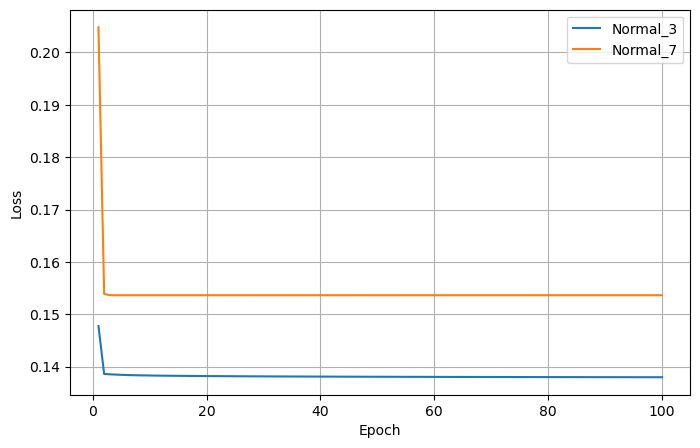

In [25]:
utility.plot_loss({"Normal_3": loss_normal_3, "Normal_7": loss_normal_7}, epochs)

##### But  skip network with 7 layer, our losses are lower than the skip network with 3 layer. 
##### As expected, because we adding more layer, so our network should perform well (low losses)


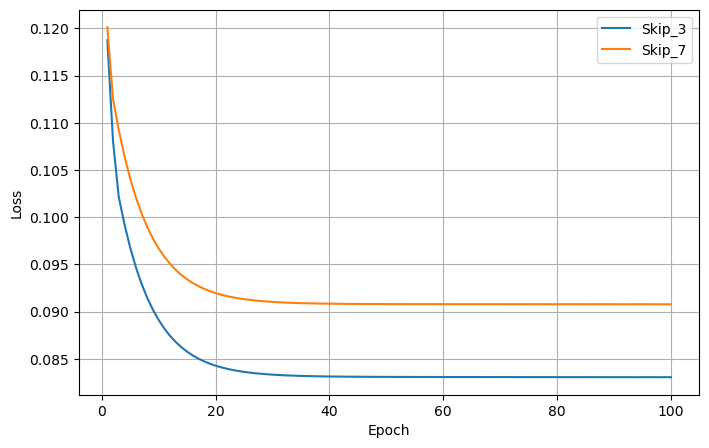

In [26]:
utility.plot_loss({"Skip_3": loss_skip_3, "Skip_7": loss_skip_7}, epochs)